## Instructions

The purpose of this assignment is to get some practice using Pandas to filter and aggregate data and use the outputs of these processes in plots.  Using one of the tools that we have discussed (matplotlib and/or pandas), construct a visualization of the Illinois Building Inventory that communicates the following information -- choose 3 out of the 4 listed below to visualize:

- Relationship between the year acquired and the year constructed
- Total square footage as a function of building status ("Bldg Status")
- Median square footage in each Year Constructed as a function of Year Acquired
- Square footage for the five most common departments (aka "Agency Name") as a function of year. 

Here "most common" refers to the departments with the most entries in the table.  You can choose year acquired or year constructed (or some sort of average of the two!), just make sure you state which you chose and why.

Each component will be worth 30 points (15 for code and 15 for write-up) and must be a completely communicative visualization -- including labels and a one paragraph writeup of your approach. 10 points will be added for the inclusion of an in-depth discussion of what things did/didn't work in your process in your writeups for each visualization (so don't forget to include this in your writeup!).

In [8]:
# imports
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
buildings = pd.read_csv("https://uiuc-ischool-dataviz.github.io/is445_AOUAOG_fall2021/week02/data/building_inventory.csv",
           na_values = {'Square Footage': 0,
                       'Year Acquired': 0,
                       'Year Constructed': 0})

In [5]:
buildings.head(5)

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


## Total square footage as a function of building status ("Bldg Status")

In [177]:
buildings.groupby("Bldg Status")["Square Footage"].sum()

Bldg Status
Abandon         2048290.0
In Progress     2314558.0
In Use         97337698.0
Name: Square Footage, dtype: float64

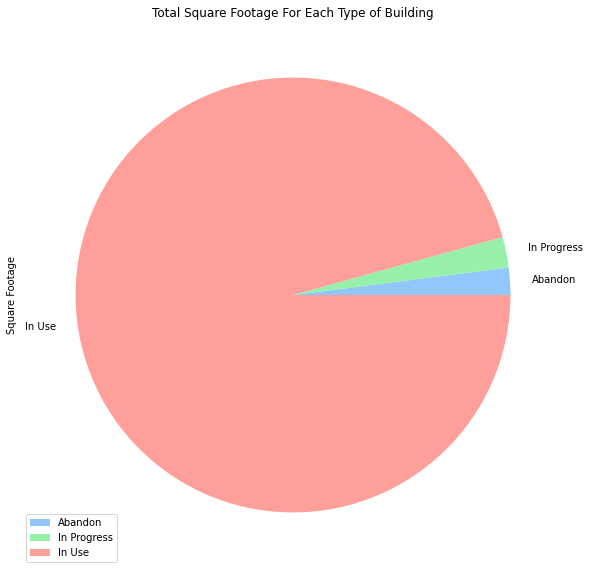

In [169]:
with plt.style.context("seaborn-pastel"):
    bldin = buildings.groupby("Bldg Status")["Square Footage"].sum()
    ax = bldin.plot(figsize=(45,10), rot=45, kind='pie', legend=True, title="Total Square Footage For Each Type of Building")

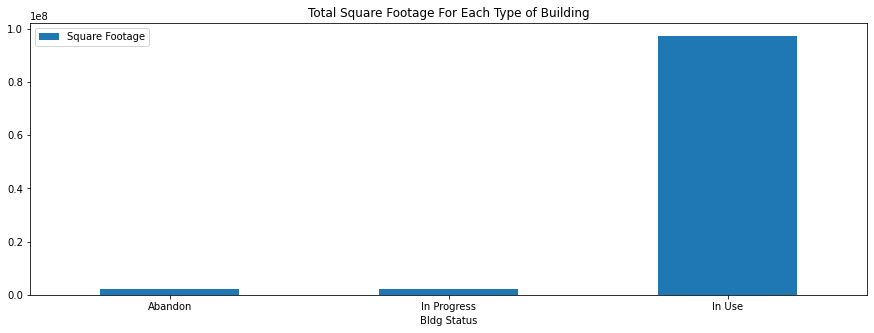

In [176]:
 ax = bldin.plot(figsize=(15,5), rot=0, kind='bar', legend=True, title="Total Square Footage For Each Type of Building")
    

   While this visualization is simple and fairly intuitive, I do think it is interesting how the "in progress" buildings are almost equal to the "abandoned" ones, as almost if they are building new ones as replacements. Most of the sqaure footage is in use, but I wonder why they hang on to so many abandoned buildings. I would assume this is historical value, since the buildings are owned by the state. 

   What bugs me about the final visualization is the tags next to the colors and the "square footage" title across the side. Even when looking through the .plot documentation, I could not figure out a way to remove them. In the end, I settled on a pie graph, even though my first instinct was to use a bar graph. However, because the "in use" value is so much greater than the value of "abandon" and "in progress," having them next to each other in a pie graph gives me a better sense of comparison. I think a stacked bar graph would achieve the similar results, however even with the use of the keyword "stacked" I was not able to make a stacked bar graph that could have helped to emphasize how many square feet there are in total. To compensate, I have also included a bar graph that may be, in a sense, a bit more accurate and useful when trying to figure out exact numbers and figures. This is since the pie graph does not say how many square feet each part is and I am not sure how to put the labels on it to include this data. 

## Year acquired vs Year constructed 

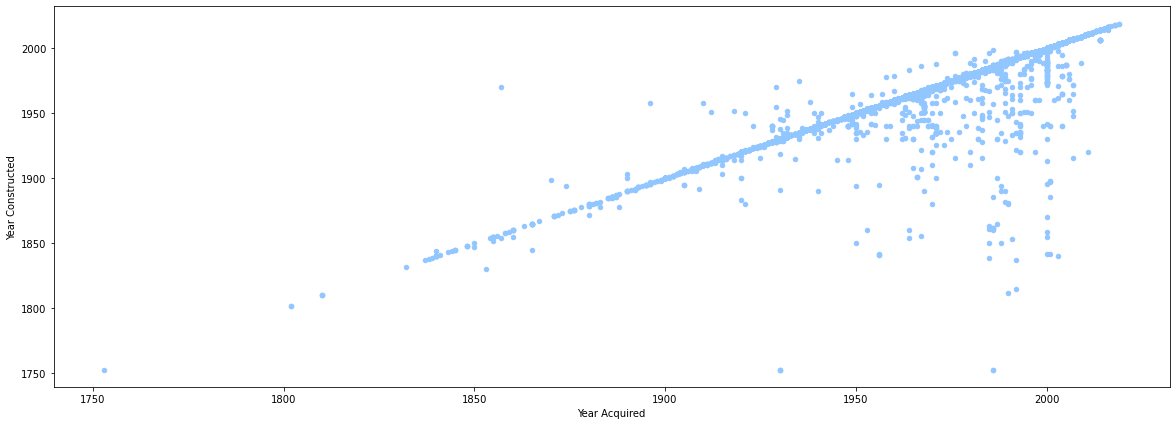

In [183]:
with plt.style.context("seaborn-pastel"):
    ax = buildings.plot(x = "Year Acquired", y="Year Constructed", figsize=(20,7), rot=0, kind='scatter')

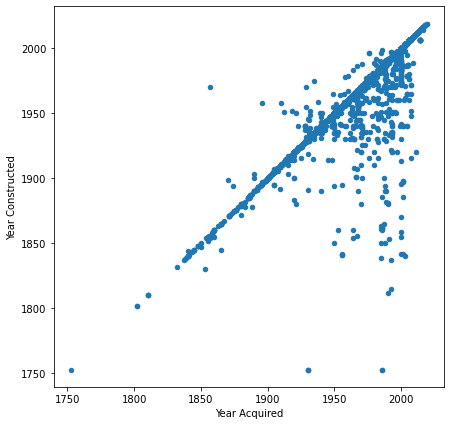

In [185]:
ax = buildings.plot(x = "Year Acquired", y="Year Constructed", figsize=(7,7), rot=0, kind='scatter')

Seeing such a clear correlation in this graph makes me happy, even though I understand this is because the buildings were commissioned by their department making it so that the year constructed and year acquired are the same. Another interesting observation from the graph is the increase in building bought over the years. If we can follow the reasoning that if the year acquired is equal to the year constructed it was built for the state and department, any divergence from that pattern means that a new building was bought, which seems to be happening more between the years 1950 and 2000. From this I can only assume that dots above the line represent buildings with extraordinarily long construction times because I cannot find another explanation for a building constructed in 1950 being acquired before 1900. 

Putting that aside, this graph was fairly straightforward, taking only two lines of code to construct. Since this was directly comparing two columns from the dataframe, the plot took one line while the styling was constructed on another (I like to play around the coloration and I chose the first scheme as the basis for the first pie chart and this plot simply because I am a fan of pastels, the colors are fairly irrelevant to me for these plots). I did think it was interesting to see the plots in different dimensions, as it gives them a slightly different feel and ease of reading. A square shape was chosen because they are both on the same scale, giving each axis a fair comparison, not being streched in the context of the other. The rectangular graph emphasizes the year acquired, and since the points are over time, that is usually shown stretched horizontally which also allows the reader to process it as they would other time-based scatter plots. 

## Square footage for the five most common departments as a function of year.

In [30]:
agencyAgg = buildings.groupby("Agency Name").count()
topDepts = agencyAgg.sort_values(by="Address", ascending=False).head(5)
topDepts[AgencyName]

,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,Senate Dist,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
Agency Name,,,,,,,,,,,,,,,,,,,,,
Department of Natural Resources,3223,3223,3223,3223,3221,3223,3201,3223,3223,3223,...,3223,3081,3047,3197,3223,3223,3223,3223,3222,3222
Department of Corrections,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,...,1428,1408,1410,1418,1428,1428,1428,1428,1428,1427
Department of Transportation,1137,1137,1137,1137,1136,1137,1124,1137,1136,1137,...,1137,1080,1086,1131,1137,1137,1137,1137,1116,1068
Department of Human Services,617,617,617,617,617,617,530,617,617,617,...,617,612,612,612,617,617,617,617,617,617
University of Illinois,525,524,525,525,525,525,525,525,525,525,...,525,524,524,525,525,525,525,525,525,525


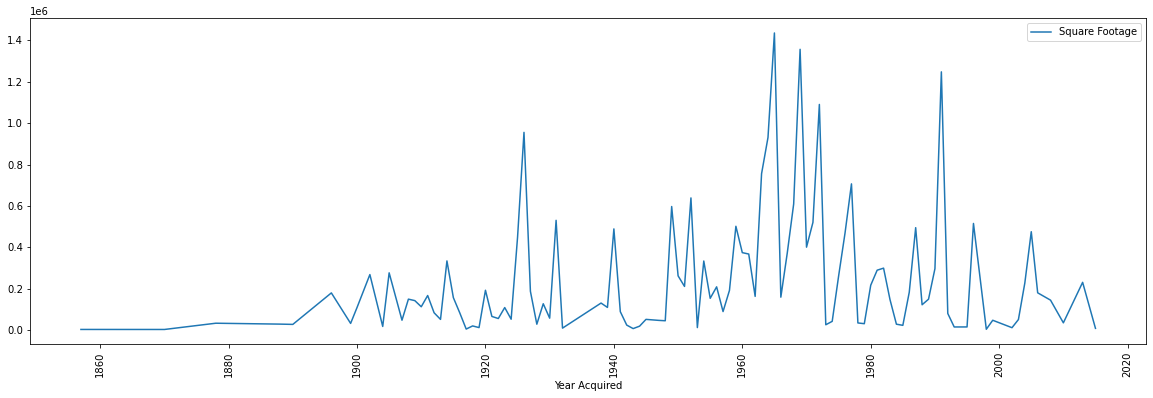

In [79]:
UIUC = buildings[buildings["Agency Name"] == "University of Illinois"]
UIUC = UIUC.groupby("Year Acquired")["Square Footage"].sum();
UIUC.plot(x = "Year Acquired", y="Square Footage", figsize=(20,6), rot=90, legend=True)

Text(0, 0.5, 'Square Footage')

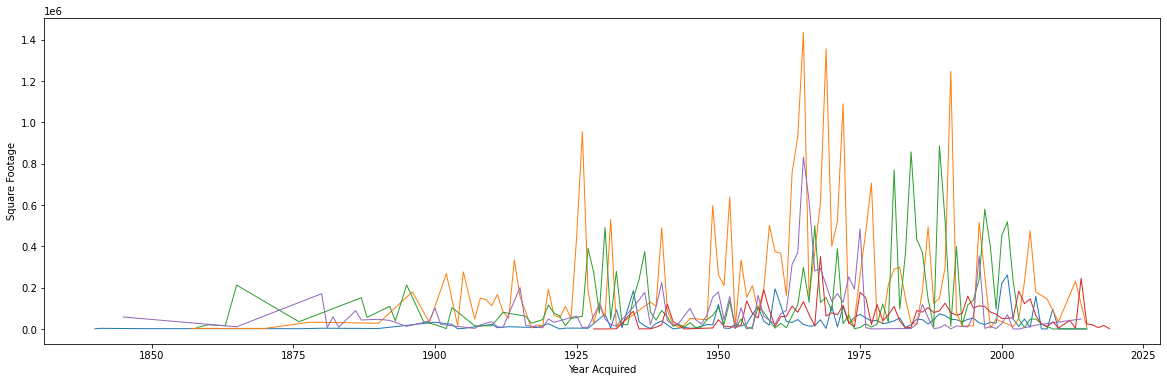

In [190]:
DNR = buildings[buildings["Agency Name"] == "Department of Natural Resources"]
DNR = DNR.groupby("Year Acquired")["Square Footage"].sum();

UIUC = buildings[buildings["Agency Name"] == "University of Illinois"]
UIUC = UIUC.groupby("Year Acquired")["Square Footage"].sum();

DoC = buildings[buildings["Agency Name"] == "Department of Corrections"]
DoC = DoC.groupby("Year Acquired")["Square Footage"].sum();

DoT = buildings[buildings["Agency Name"] == "Department of Transportation"]
DoT = DoT.groupby("Year Acquired")["Square Footage"].sum();

DHS = buildings[buildings["Agency Name"] == "Department of Human Services"]
DHS = DHS.groupby("Year Acquired")["Square Footage"].sum();

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(DNR1, linewidth = 1.0) # blue, most buildings
ax.plot(UIUC, linewidth = 1.0) # orange, 5th most buildings
ax.plot(DoC, linewidth = 1.0) # green, 2nd most buildings
ax.plot(DoT, linewidth = 1.0) # red, 3rd most buildings
ax.plot(DHS, linewidth = 1.0) # purple, 4th most buildings

ax.set_xlabel("Year Acquired")
ax.set_ylabel("Square Footage")



I'm not quite sure about this graph, it is a little chaotic. However, out of the three it was the most challenging. First, I had to find the five agencies with the most buildings and then take slices of the larger database containing only a certain agency. This was grouped by year to find the total square footage per department per year. Lastly, I had to combine all of the plots onto one which presented difficulties for me. Perservering, I read through documentation and stack overflow until I figured it out. Even now, I am not quite happy with the final output. When I tried to get it to automatically placed labels based on agency name or even any labels at all it yelled at me, I'm not quite sure why. Even with the colors labelled, it still is not an easy graph to read. Due to this being a series I'm not quite sure if it would let me do a bar graph, but I believe a stacked bar graph with the x-axis being each year acquired would make this data the easiest to read. That way one would be able to see the total square footage each year for the five combined and it would be easier to the naked eye to pick out the agency with the most square footage overall. What one can discern from this graph however, is that the most buildings does not always equal to the most square footage. In the graph we see the University of Illinois (orange) having the most square footage for many years despite falling fifth on the list. Purple, or Department of Human Services, also seems to have a lot of square footage even as they come fourth on the list. In the end, it is hard to tell from the graph alone who has the most buildings or square footage overall. Lastly, I wanted to touch on my choice to use year acquired over year constructed. When using the year acquired, the graph would showcase how much square footage the agency has at each point in time. I found that to also be an interesting statistic because it would showcase years with many acquisitions. 